## Problem Set 3
## MACS 30250
## Submitted by - Nipun Thakurele

In [11]:
import numpy as np
import time
import scipy.optimize as opt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

beta = 0.442
nvec = np.array([1, 1, 0.2])
delta = 0.6415
sigma = 3
A = 1
alpha = 0.35

In [12]:
def get_wage(alpha, A, K, L):
    return (1 -alpha) * A * (K / L) ** alpha

def get_r(alpha, A, L, K, delta):
    return alpha * A * (L / K) ** (1 - alpha) - delta
    

# Question 2.1

In [13]:
def feasible(f_params, bvec_guess):
        nvec, A, alpha, delta = f_params
        b2, b3 = bvec_guess
        K = sum(bvec_guess)
        K_cnstr = (K <= 0)        
        L = sum(nvec)
        wage = get_wage(alpha, A, K, L)
        rate = get_r(alpha, A, L, K, delta)
        c1 = nvec[0] * wage - b2
        c2 = nvec[1] * wage + (1 + rate) * b2 - b3
        c3 = nvec[2] * wage + (1 + rate) * b3
        c_cnstr = [(c1 <= 0), (c2 <= 0), (c3 <= 0)]
        b_cnstr = [c_cnstr[0] or c_cnstr[1], c_cnstr[1] or c_cnstr[2]]
        return b_cnstr, c_cnstr, K_cnstr

In [14]:
f_params = nvec, A, alpha, delta
bvec_guess = np.array([1.0, 1.2])
print(feasible(f_params, bvec_guess))

([True, False], [True, False, False], False)


**Question 2.1 (Part a)** <br />
The first-period constraints are violated, as seen in the output above.

In [15]:
bvec_guess = np.array([0.06, -0.001])
feasible(f_params, bvec_guess)

([False, False], [False, False, False], False)

**Question 2.1 (Part b)** <br />
None of the constraints are violated

In [16]:
bvec_guess = np.array([0.1, 0.1])
feasible(f_params, bvec_guess)

([False, False], [False, False, False], False)

**Question 2.1 (Part c)** <br />
None of the constraints are violated

# Question 2.2

In [17]:
def get_EulErr(c_ss, sigma, beta, r_ss):
    EulErr = np.zeros(2)
    for i in range(2):
        EulErr[i] = (c_ss[i] ** -sigma) - beta * (1 + r_ss) * (c_ss[i + 1] ** -sigma)
    return EulErr

In [18]:
def get_SS(params, bvec_guess, SS_graphs):
    start_time = time.clock()
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    
    b_ss = np.array(opt.root(solver, bvec_guess, args=params).x)
    K_ss = sum(b_ss)
    w_ss = get_wage(alpha, A, K_ss, L)
    r_ss = get_r(alpha, A, L, K_ss, delta)
    
    Y_ss=A * (K_ss ** alpha) * (L ** (1 - alpha))

    c1 = w_ss - b_ss[0]
    c2 = w_ss + (1 + r_ss) * b_ss[0] - b_ss[1]
    c3 = 0.2 * w_ss + (1 + r_ss) * b_ss[1]
    c_ss = np.array([c1, c2, c3])
    C_ss = c1 + c2 + c3
    EulErr_ss = get_EulErr(c_ss, sigma, beta, r_ss)    
    
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    ss_time = time.clock() - start_time
    
    if SS_graphs:
        %matplotlib notebook
        t1 = np.array([1,2,3])
        t2 = np.array([2,3])
        plt.plot(t1, c_ss, marker='o',label='consumption')
        plt.plot(t2, b_ss, marker='o',label='savings')
        plt.xlabel('Agent\'s age')
        plt.ylabel('Agent\'s comsumption and savings')
        plt.title('Steady-state distribution of consumption and savings by age')
        plt.legend()
    
    ss_output = {'b_ss': b_ss, 'c_ss': c_ss,
                 'w_ss': w_ss, 'r_ss': r_ss,
                 'K_ss': K_ss, 'Y_ss': Y_ss,
                 'C_ss': C_ss, 'EulErr_ss': EulErr_ss,
                 'RCerr_ss': RCerr_ss, 'ss_time': ss_time}
    return ss_output

In [19]:
def solver(bvec_guess, *args):
    b2, b3 = bvec_guess
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = args

    K_ss = b2 + b3
    w_ss = (1 - alpha) * A * (K_ss / L) ** alpha
    r_ss = alpha * A * (L / K_ss) ** (1 - alpha) - delta
    C_ss = np.array([w_ss-b2, w_ss + (1 + r_ss) * b2 - b3, 0.2 * w_ss + (1 + r_ss) * b3])    
    EulErr_ss = get_EulErr(C_ss, sigma, beta, r_ss)
    return EulErr_ss

**Question 2.2 (Part a)**

In [20]:
L = 2.2
SS_tol = 1e-9
params = (beta, sigma, nvec, L, A, alpha, delta, SS_tol)
res = get_SS(params, bvec_guess, False)
res

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.0003869999999999152}

**Question 2.2 (Part b)**

<IPython.core.display.Javascript object>


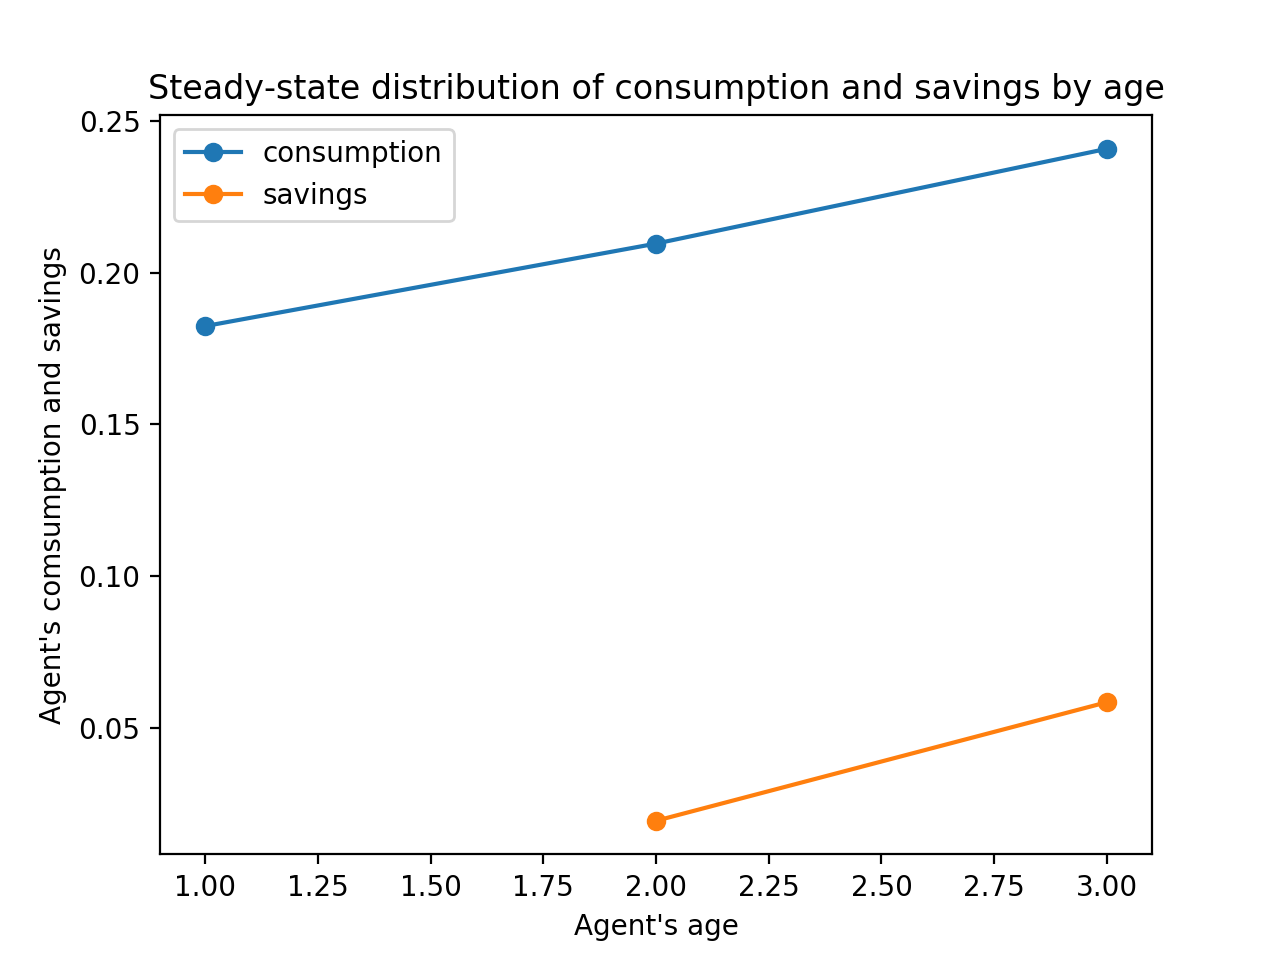

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.0004210000000000047}

In [21]:
get_SS(params, bvec_guess, True)


**Question 2.2 (Part c)**

In [22]:
beta = 0.55
params2 = (beta, sigma, nvec, L, A, alpha, delta, SS_tol)
res2 = get_SS(params2, bvec_guess, False)
res2

{'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'w_ss': 0.22415219593446706,
 'r_ss': 1.8863765057189819,
 'K_ss': 0.1050423702259807,
 'Y_ss': 0.7586689708551193,
 'C_ss': 0.6912842903551526,
 'EulErr_ss': array([6.87805368e-12, 2.52953214e-12]),
 'RCerr_ss': 9.71445146547012e-17,
 'ss_time': 0.0003340000000000565}

<IPython.core.display.Javascript object>


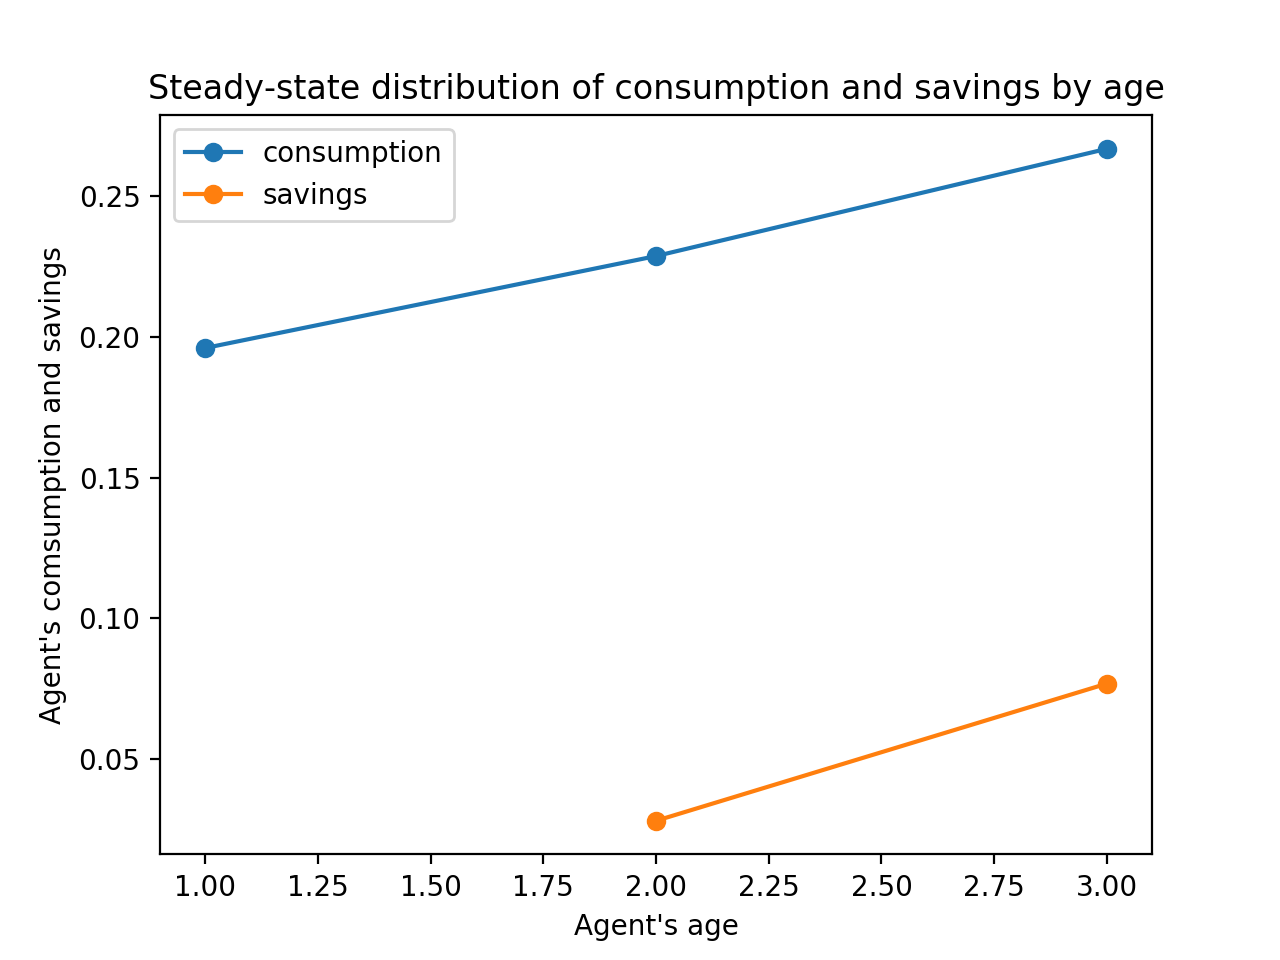

{'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'w_ss': 0.22415219593446706,
 'r_ss': 1.8863765057189819,
 'K_ss': 0.1050423702259807,
 'Y_ss': 0.7586689708551193,
 'C_ss': 0.6912842903551526,
 'EulErr_ss': array([6.87805368e-12, 2.52953214e-12]),
 'RCerr_ss': 9.71445146547012e-17,
 'ss_time': 0.0004610000000000447}

In [23]:
get_SS(params2, bvec_guess, True)


As beta value increases (here, from 0.442 to 0.55) consumption, savings and wage also increases. However, the interest rate decreases with an increase in the value of beta. <br />
Hence, people start saving more in the current periods which results in higher savings which results in an increase in firm capital. <br />
As a consequence of increase in firm capital, the  consumption increases due to higher wage rates.

# Question 2.3

In [24]:
beta = 0.442
nvec = np.array([1, 1, 0.2])
delta = 0.6415
sigma = 3
A = 1
alpha = 0.35

In [25]:
T = 30
max_iter = 300
TPI_tol = 1e-9
xi = 0.2
b_ss = res['b_ss']
K_ss = res['K_ss']
w_ss = res['w_ss']
r_ss = res['r_ss']
b1vec = np.array([0.8 * b_ss[0], 1.1 * b_ss[1]])
K1 = b1vec.sum()
Kpath = np.zeros(T + 1)
Kpath[:-1] = np.linspace(K1, K_ss, T)
Kpath[-1] = K_ss

In [26]:
def get_wage(alpha, A, K, L):
    return (1 -alpha) * A * (K / L) ** alpha

def get_r(alpha, A, L, K, delta):
    return alpha * A * (L / K) ** (1 - alpha) - delta

def get_euler_err1(b3, *args):   
    nvec, beta, sigma, b2, w_path, r_path = args
    n2, n3 = nvec
    w1, w2 = w_path
    r1, r2 = r_path
    c2 = (1 + r1) * b2 + w1 * n2 - b3
    c3 = (1 + r2) * b3 + w2 * n3
    MU2 = c2 ** (-sigma)
    MU3 = c3 ** (-sigma)
    err1 = MU2 - beta * (1 + r2) * MU3
    return err1

def get_euler_err2(bvec, *args):
    nvec, beta, sigma, w_path, r_path = args
    b = np.append([0], bvec)
    b1 = np.append(bvec, [0])
    cvec = (1 + np.append([0], r_path)) * b + w_path * nvec - b1  
    MU = cvec ** (-sigma)
    err2 = MU[:-1] - beta * (1 + r_path) * MU[1:]
    return err2

**Question 2.3 (Part a)**

In [27]:
dist = 1
TPI_iter = 0
L = nvec.sum()

while dist > TPI_tol and TPI_iter < max_iter:
    TPI_iter += 1
    w_path = get_wage(alpha, A, Kpath, L)
    r_path = get_r(alpha, A, L, Kpath, delta)
    b = np.zeros((2, T + 1))
    b[:, 0] = b1vec
    b32 = opt.root(get_euler_err1, b[1, 0], (nvec[1:], beta, sigma, b[0, 0], w_path[:2], r_path[:2]))
    b[1, 1] = b32.x 
    for t in range(T - 1):
        bvec_guess = np.array([b[0, t], b[1, t + 1]])
        bt = opt.root(get_euler_err2, bvec_guess, (nvec, beta, sigma, w_path[t : t + 3], r_path[t + 1: t + 3]))
        b[0, t + 1] = bt.x[0]
        b[1, t + 2] = bt.x[1]
    Kpath_new = b.sum(axis = 0)
    dist = ((Kpath[:] - Kpath_new[:]) ** 2).sum()
    Kpath = xi * Kpath_new + (1 - xi) * Kpath
    print('iteration:', TPI_iter, ' squared distance: ', dist)

iteration: 1  squared distance:  0.0004014991152066923
iteration: 2  squared distance:  0.0002826966652592939
iteration: 3  squared distance:  0.00020026875465885345
iteration: 4  squared distance:  0.0001426592082072127
iteration: 5  squared distance:  0.00010212481834275573
iteration: 6  squared distance:  7.343027146808576e-05
iteration: 7  squared distance:  5.30051139372996e-05
iteration: 8  squared distance:  3.8394216775871686e-05
iteration: 9  squared distance:  2.7896278348728884e-05
iteration: 10  squared distance:  2.0323858102749774e-05
iteration: 11  squared distance:  1.4842654861254007e-05
iteration: 12  squared distance:  1.0862919656135854e-05
iteration: 13  squared distance:  7.96547263703129e-06
iteration: 14  squared distance:  5.850890391607051e-06
iteration: 15  squared distance:  4.304341150838523e-06
iteration: 16  squared distance:  3.171075543533071e-06
iteration: 17  squared distance:  2.339231165119519e-06
iteration: 18  squared distance:  1.7276951873671011

**Question 2.3 (Part b)**

<IPython.core.display.Javascript object>


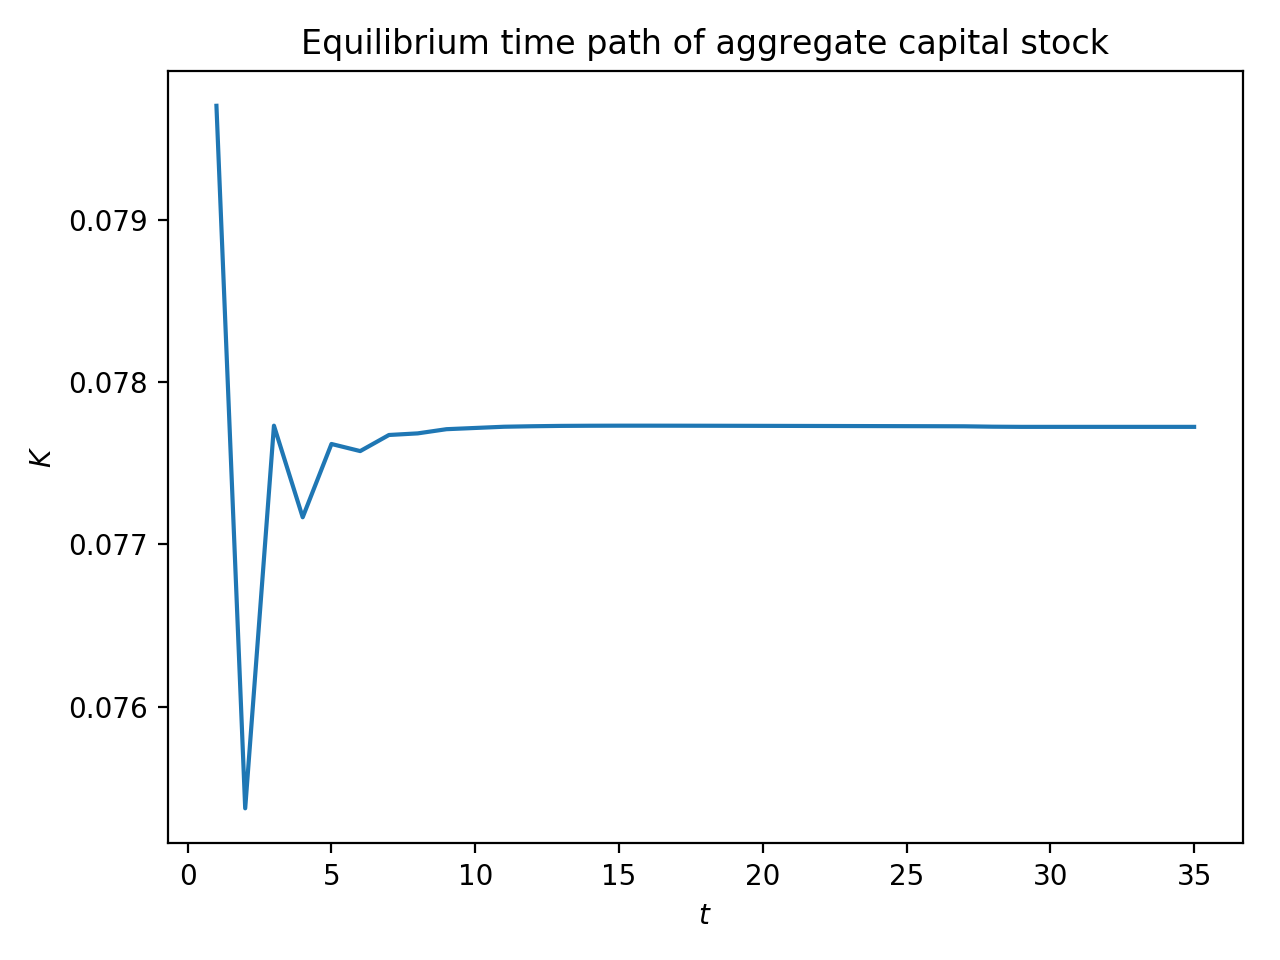

In [28]:
%matplotlib notebook
xval = np.arange(1, T + 6)
yval = np.append(Kpath[:T-2], K_ss * np.ones(7))
plt.plot(xval, yval)
plt.title('Equilibrium time path of aggregate capital stock', fontsize=12)
plt.xlabel(r'$t$')
plt.ylabel(r'$K$')
plt.tight_layout()

<IPython.core.display.Javascript object>


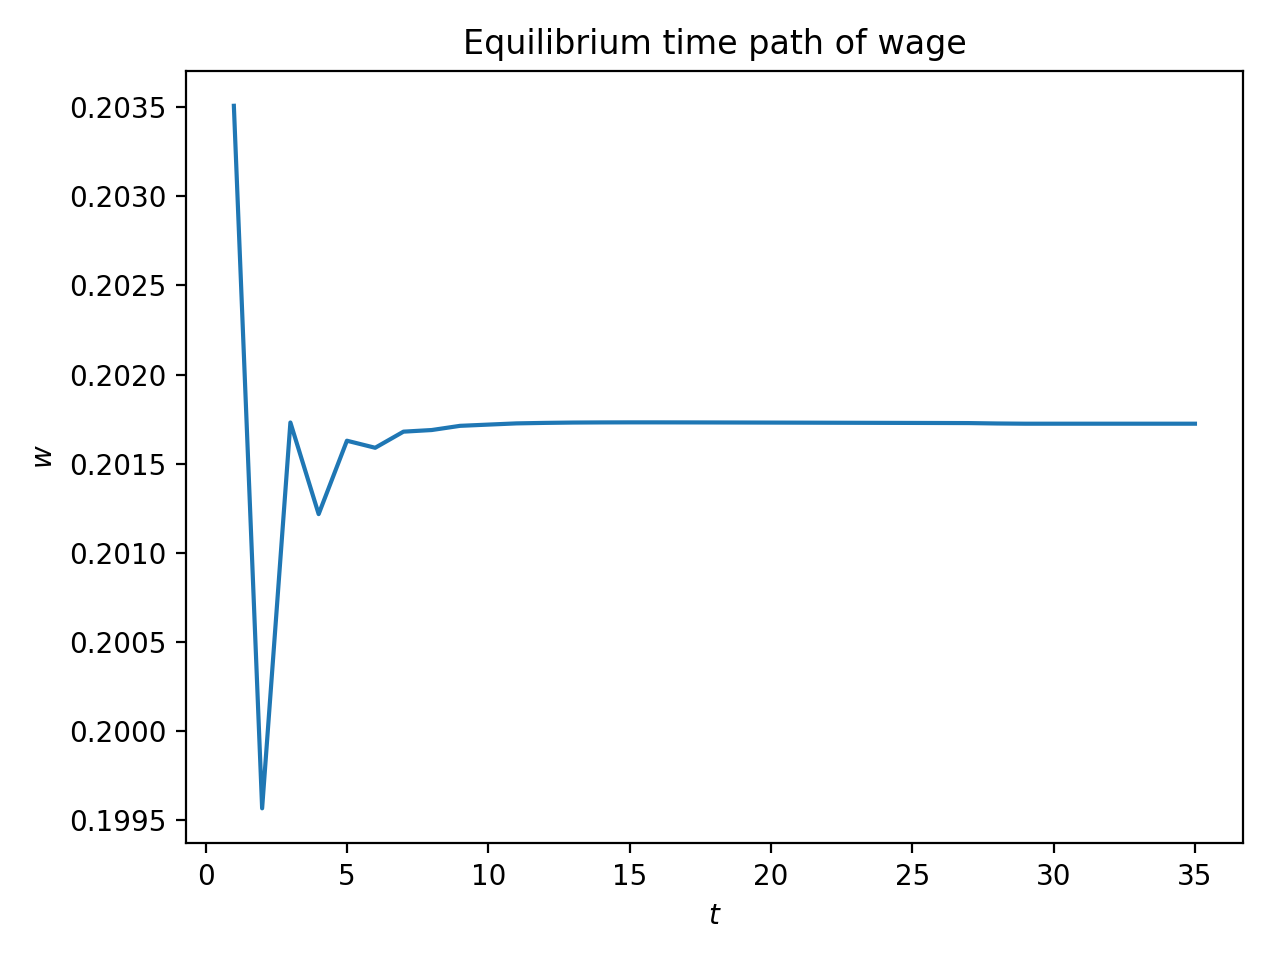

In [29]:
%matplotlib notebook
xval = np.arange(1, T + 6)
yval = np.append(w_path[:T-2], w_ss * np.ones(7))
plt.plot(xval, yval)
plt.title('Equilibrium time path of wage', fontsize=12)
plt.xlabel(r'$t$')
plt.ylabel(r'$w$')
plt.tight_layout()

<IPython.core.display.Javascript object>


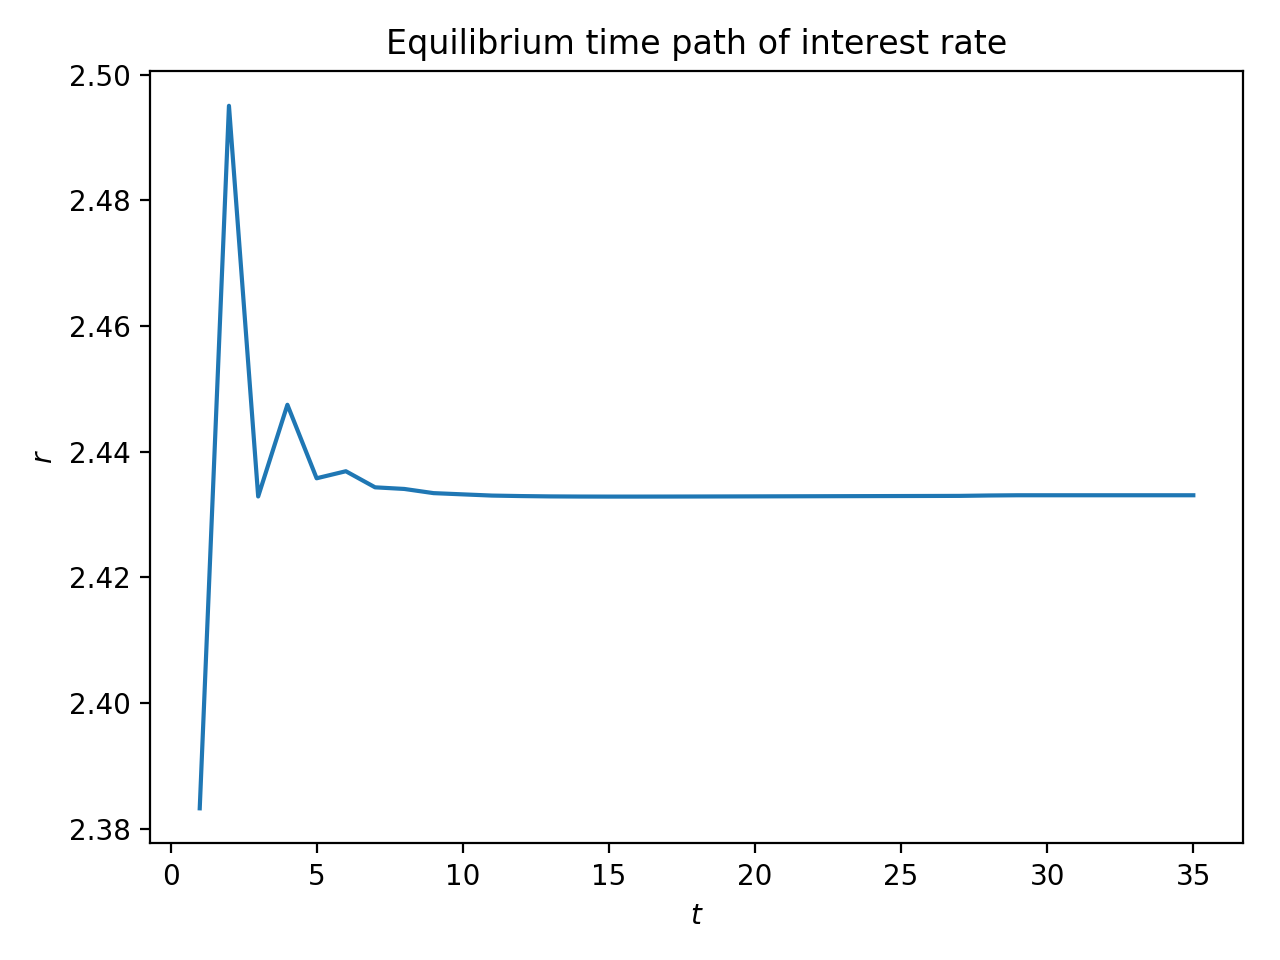

In [30]:
%matplotlib notebook
xval = np.arange(1, T + 6)
yval = np.append(r_path[:T-2], r_ss * np.ones(7))
plt.plot(xval, yval)
plt.title('Equilibrium time path of interest rate', fontsize=12)
plt.xlabel(r'$t$')
plt.ylabel(r'$r$')
plt.tight_layout()

In [31]:
k_first = [k for k in Kpath if abs(k - K_ss) < 0.00001][0]
t1 = np.where(Kpath == k_first)[0][0]
print('first instance at time : ', t1+1)

k_last = [k for k in Kpath[:-3] if abs(k - K_ss) > 0.00001][-1]
t2 = np.where(Kpath == k_last)[0][0]
print('never out of bounds after time : ', t2+1)

first instance at time :  3
never out of bounds after time :  9


**Question 2.3 (Part c)**

The economy was within 0.00001 of the steady-state aggregate capital stock with 3 time periods. <br />
And, after the 9th period aggregate capital stock is within 0.00001 margin of the steady-state capital stock value.